## winequality-redを用いた、密度とアルコール度数の相関

## ライブラリのインポート

In [107]:
import sys
import numpy as np
import scipy as sp
import sklearn
import pandas as pd
import matplotlib
import seaborn as sns


## Pandasによる読み込み

In [108]:
wine = pd.read_csv("winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [109]:
wine.loc[:,['density']].head()

,density
0,0.9978
1,0.9968
2,0.9970
3,0.9980
4,0.9978


## numpyによる変換

In [110]:
X = np.array(wine.loc[:, ['density']])

In [111]:
X[:5]

array([[0.9978],
       [0.9968],
       [0.997 ],
       [0.998 ],
       [0.9978]])

In [112]:
Y = np.array(wine.loc[:,['alcohol']])

In [113]:
Y[:5]

array([[9.4],
       [9.8],
       [9.8],
       [9.8],
       [9.4]])

## データの観察　データの可視化

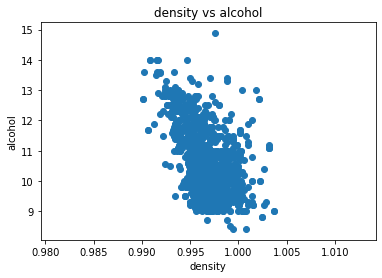

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,Y)
plt.title('density vs alcohol')
plt.xlabel('density')
plt.ylabel('alcohol')
plt.show()



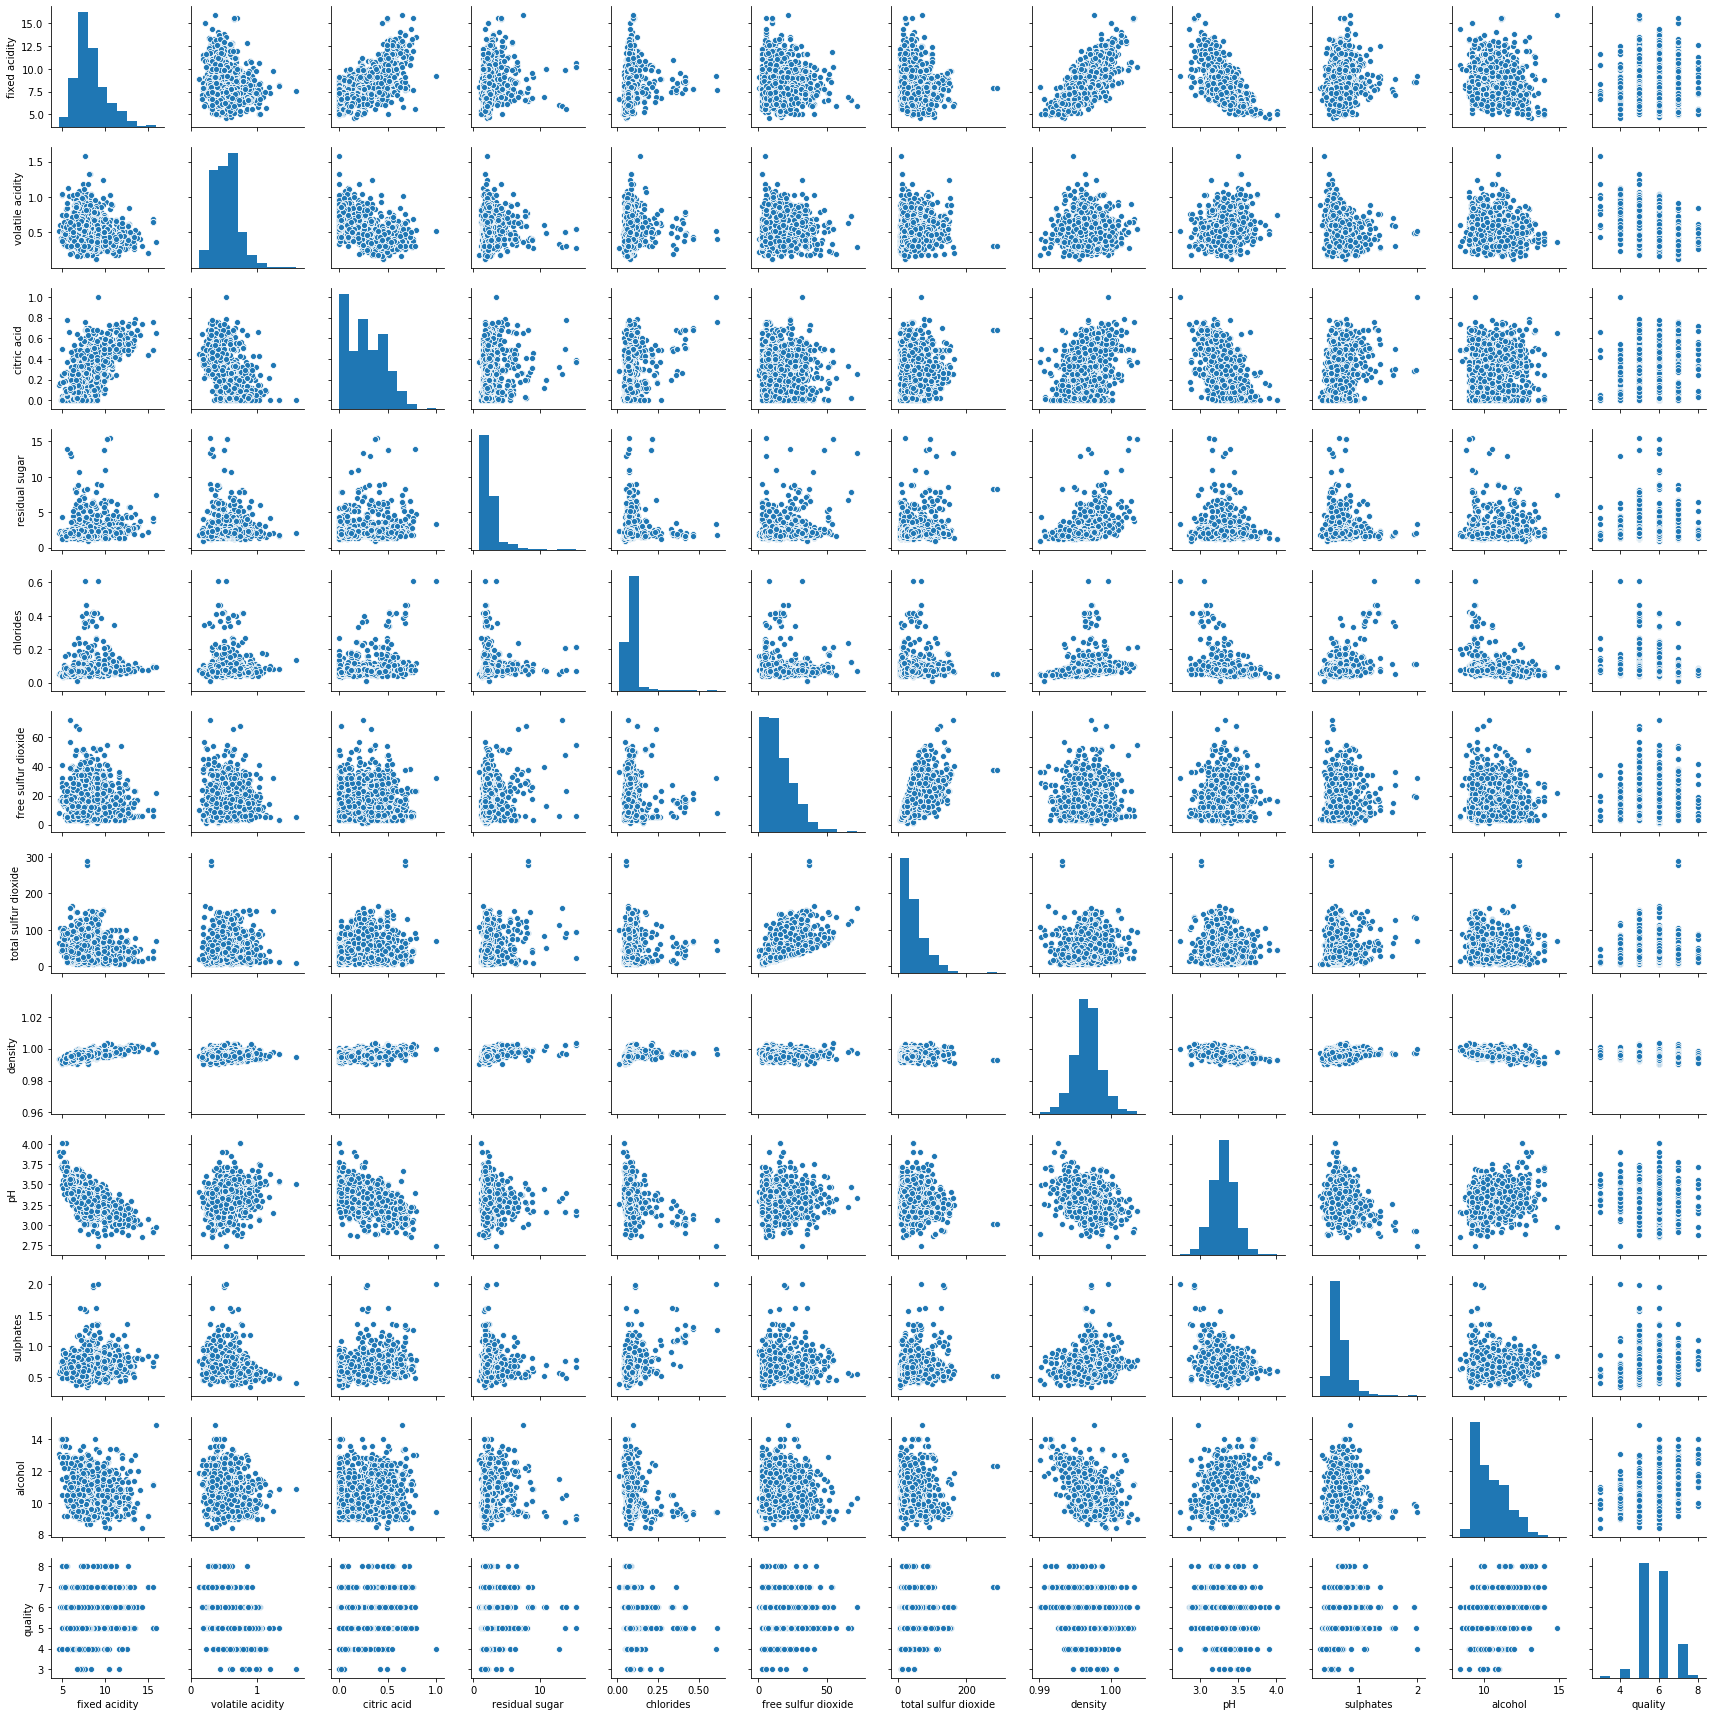

In [115]:
sns.pairplot(wine,height=2.0)
plt.show()

## 相関係数のチェック

In [116]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## テストデータの分割

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=0)

In [118]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1599, 1)
(1599, 1)
(1439, 1)
(1439, 1)
(160, 1)
(160, 1)


## 線形モデルの構築

## 線形モデルの学習

In [119]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.model_selection import learning_curve
ls = learning_curve(lr, X_train, Y_train)
lr.fit(X_train, Y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## モデルの解釈

In [120]:
lr.intercept_

array([292.48700183])

In [121]:
lr.coef_

array([[-282.98820702]])

## 線形モデルの確認

## 線形モデルの可視化

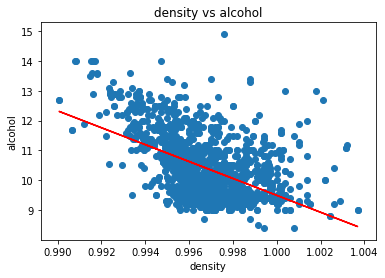

In [122]:
plt.plot(X_train, lr.predict(X_train), color = 'red')

plt.scatter(X_train, Y_train)
plt.title('density vs alcohol')
plt.xlabel('density')
plt.ylabel('alcohol')
plt.show()


## 回帰式の活用

In [123]:
density_1 = np.array([[1.000]])

lr.predict(density_1)

array([[9.4987948]])

## モデルの評価

In [124]:
print('train: %.3f' % lr.score(X_train, Y_train))
print('test : %.3f' % lr.score(X_test, Y_test))

train: 0.250
test : 0.207


## ----
## 重回帰・多項式関数による回帰

In [125]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


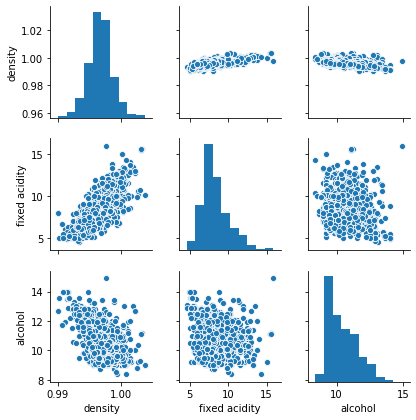

In [126]:
sns.pairplot(wine.loc[:,['density','fixed acidity','alcohol']],height=2.0)


## 前処理

In [127]:
X2 = wine.loc[:, ['density', 'fixed acidity']].values
X2

array([[0.9978 , 7.4    ],
       [0.9968 , 7.8    ],
       [0.997  , 7.8    ],
       ...,
       [0.99574, 6.3    ],
       [0.99547, 5.9    ],
       [0.99549, 6.     ]])

In [128]:
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.2, random_state = 0)

In [129]:
# 分割されたデータの個数を確認
print(X2.shape)
print(Y.shape)
print(X2_train.shape)
print(Y_train.shape)
print(X2_test.shape)
print(Y_test.shape)

(1599, 2)
(1599, 1)
(1279, 2)
(1279, 1)
(320, 2)
(320, 1)


## 重回帰モデル

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X2_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
lr.intercept_

array([460.29553183])

In [132]:
lr.coef_

array([[-4.53769374e+02,  2.89836055e-01]])

重回帰モデルは以下の関数になる
$$ y = 460.3 -453.8x_1 + 0.290x_2 $$

## モデルの評価

In [133]:
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X2_train, Y_train))
print('test : %.3f' % lr.score(X2_test, Y_test))

train: 0.371
test : 0.403


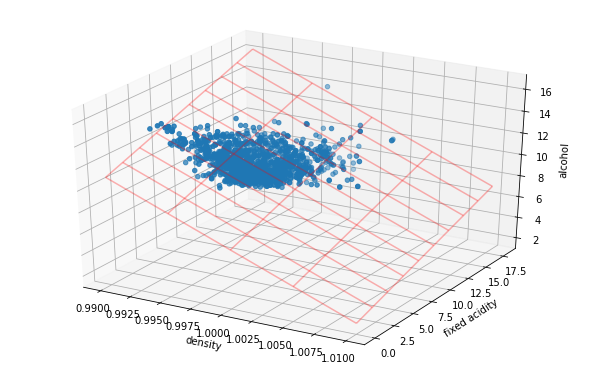

In [134]:
# mpl_toolkitsを用いて3次元の描画する
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(8, 5)))

# (x, y , z)
ax.scatter3D(wine['density'], wine['fixed acidity'], wine['alcohol'])

# 関数の指定
X_grid, Y_grid = np.meshgrid(np.arange(0.99, 1.01, 0.005), np.arange(0, 20, 2))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 平面の描画
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# ラベル
ax.set_xlabel('density')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('alcohol')

plt.show()

## 多項式回帰

In [135]:
dens = wine.loc[:, ['density']].values
fixed_acidity = wine.loc[:, ['fixed acidity']].values
y = wine.loc[:, ['alcohol']].values

In [136]:
from sklearn.model_selection import train_test_split
dens_train, dens_test, y_train, y_test = train_test_split(dens, y, test_size = 0.2, random_state = 0)

## 単回帰

In [137]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(dens_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

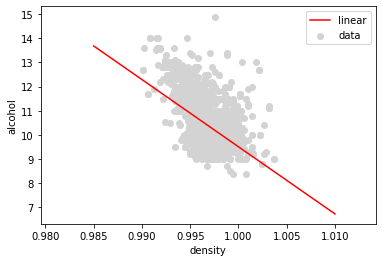

In [138]:
# データの散布図表示
plt.scatter(dens, y, color='lightgray', label='data')
x = np.arange(0.985, 1.01, 0.005)[:, np.newaxis]

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')
# ラベルを表示
plt.xlabel('density')
plt.ylabel('alcohol')

# 凡例
plt.legend(loc = 'upper right')

plt.show()

## 多項式回帰

In [139]:
# 変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
dens_quad = quad.fit_transform(dens)
dens_quad

array([[1.        , 0.9978    , 0.99560484],
       [1.        , 0.9968    , 0.99361024],
       [1.        , 0.997     , 0.994009  ],
       ...,
       [1.        , 0.99574   , 0.99149815],
       [1.        , 0.99547   , 0.99096052],
       [1.        , 0.99549   , 0.99100034]])

In [140]:
## データの分割
dens_quad_train, dens_quad_test, y_train, y_test = train_test_split(dens_quad, y, test_size = 0.2, random_state = 0)

In [141]:
model_quad = LinearRegression()
model_quad.fit(dens_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

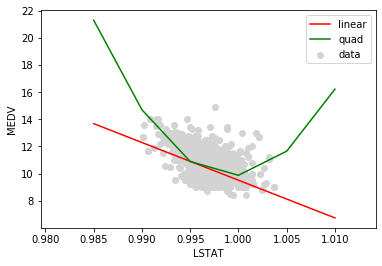

In [142]:
#データの散布図を表示
plt.scatter(dens, y, color='lightgray', label='data')

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')

# 変数変換する
x_quad = quad.fit_transform(x)

# 回帰曲線を表示（2次関数）
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')

# ラベルを表示
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 凡例を表示
plt.legend(loc = 'upper right')

# 上記の内容でグラフを表示
plt.show()

In [143]:
# 変数変換

cubic = PolynomialFeatures(degree=3)

dens_cubic = cubic.fit_transform(dens)
dens_cubic

array([[1.        , 0.9978    , 0.99560484, 0.99341451],
       [1.        , 0.9968    , 0.99361024, 0.99043069],
       [1.        , 0.997     , 0.994009  , 0.99102697],
       ...,
       [1.        , 0.99574   , 0.99149815, 0.98727437],
       [1.        , 0.99547   , 0.99096052, 0.98647147],
       [1.        , 0.99549   , 0.99100034, 0.98653093]])

In [144]:
#データ分割
dens_cubic_train, dens_cubic_test, _, _ = train_test_split(dens_cubic, y, test_size = 0.2, random_state = 0)

In [145]:
#モデルの学習
model_cubic = LinearRegression()
model_cubic.fit(dens_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

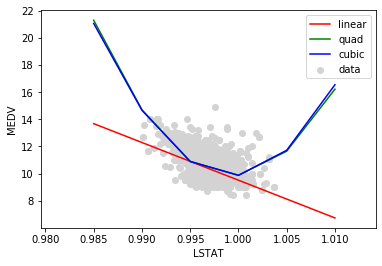

In [146]:
plt.scatter(dens, y, color='lightgray', label='data') 
plt.plot(x, model_lin.predict(x), color='red', label='linear')
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')
x_cubic = cubic.fit_transform(x)
plt.plot(x, model_cubic.predict(x_cubic), color='blue', label='cubic')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

決定係数

In [105]:
#線形回帰
print('train: %.3f' % model_lin.score(dens_train, y_train)) 
print('test : %.3f' % model_lin.score(dens_test, y_test))

#2次関数
print('train: %.3f' % model_quad.score(dens_quad_train, y_train)) 
print('test : %.3f' % model_quad.score(dens_quad_test, y_test))

#3次関数
print('train: %.3f' % model_cubic.score(dens_cubic_train, y_train)) 
print('test : %.3f' % model_cubic.score(dens_cubic_test, y_test))

# 重回帰
print('train: %.3f' % lr.score(X2_train, Y_train))
print('test : %.3f' % lr.score(X2_test, Y_test))

train: -0.372
test : -0.369
train: -0.302
test : -0.280
train: -0.286
test : -0.272
train: 0.001
test : -0.011


用いるモデル

線形回帰

モデルを選んだ理由

調べられた１次関数・２次関数・３次関数での多項式回帰・重回帰モデルのうち、決定係数から、訓練データにおいてもテストデータにおいても、1次関数での回帰がデータのモデルへの当てはまりの良さが最も良いことが示されているから。また、下記のようにグラフの可視化を行っても、１次関数での回帰がデータのモデルへの当てはまりが良く見られるから。


解釈

UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wine Quality Data Set (ワインの品質)」の赤ワインのデータセットを用い、赤ワインはdensityが高いほどアルコール度数が高いという仮説を立て検証した。説明変数をdensity,目的変数をalcoholとおき、重回帰分析・多項式関数による回帰分析を実施した。 
決定係数から、訓練データにおいてもテストデータにおいても、1次関数での回帰がデータのモデルへの当てはまりの良さが最も良いことが示されていること、また、下グラフの可視化から、１次関数での回帰がデータのモデルへの当てはまりが良く見られることにより、単回帰分析が用いるモデルとして適切と判断した。
単回帰分析結果、densityが高いほどアルコール度数が低くなるという結果が出て、仮説と反対の結果が出た。アルコール（エタノール）の分子量46と比べて、赤ワインの成分（ブドウ果汁）の分子量が大きいことがこの結果の要因であると考えられる。また、相関係数が-0.496とそれほど高くないことから、この結果が妥当であるかと言うことについては、より多くのデータセットを持ってくるのが妥当であろうと考えられる。
多項式関数にて、出力したモデルに微分不可能な点が出ていることの理由を探ることが、今後の課題である。

## winequality-whiteを用いた密度とアルコール度数の相関

## 白ワイン　重回帰と多項式回帰

In [147]:
wwine = pd.read_csv("winequality-white.csv", sep=";")
wwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [148]:
wwine.loc[:,['density']].head()

,density
0,1.0010
1,0.9940
2,0.9951
3,0.9956
4,0.9956


In [149]:
Xw = np.array(wwine.loc[:, ['density']])

In [150]:
Xw[:5]

array([[1.001 ],
       [0.994 ],
       [0.9951],
       [0.9956],
       [0.9956]])

In [151]:
Y_w = np.array(wwine.loc[:,['alcohol']])

In [152]:
Y_w[:5]

array([[ 8.8],
       [ 9.5],
       [10.1],
       [ 9.9],
       [ 9.9]])

データの観察　データの可視化

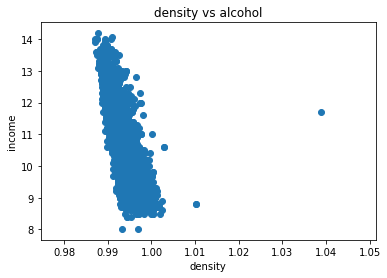

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xw,Y_w)
plt.title('density vs alcohol')
plt.xlabel('density')
plt.ylabel('income')
plt.show()


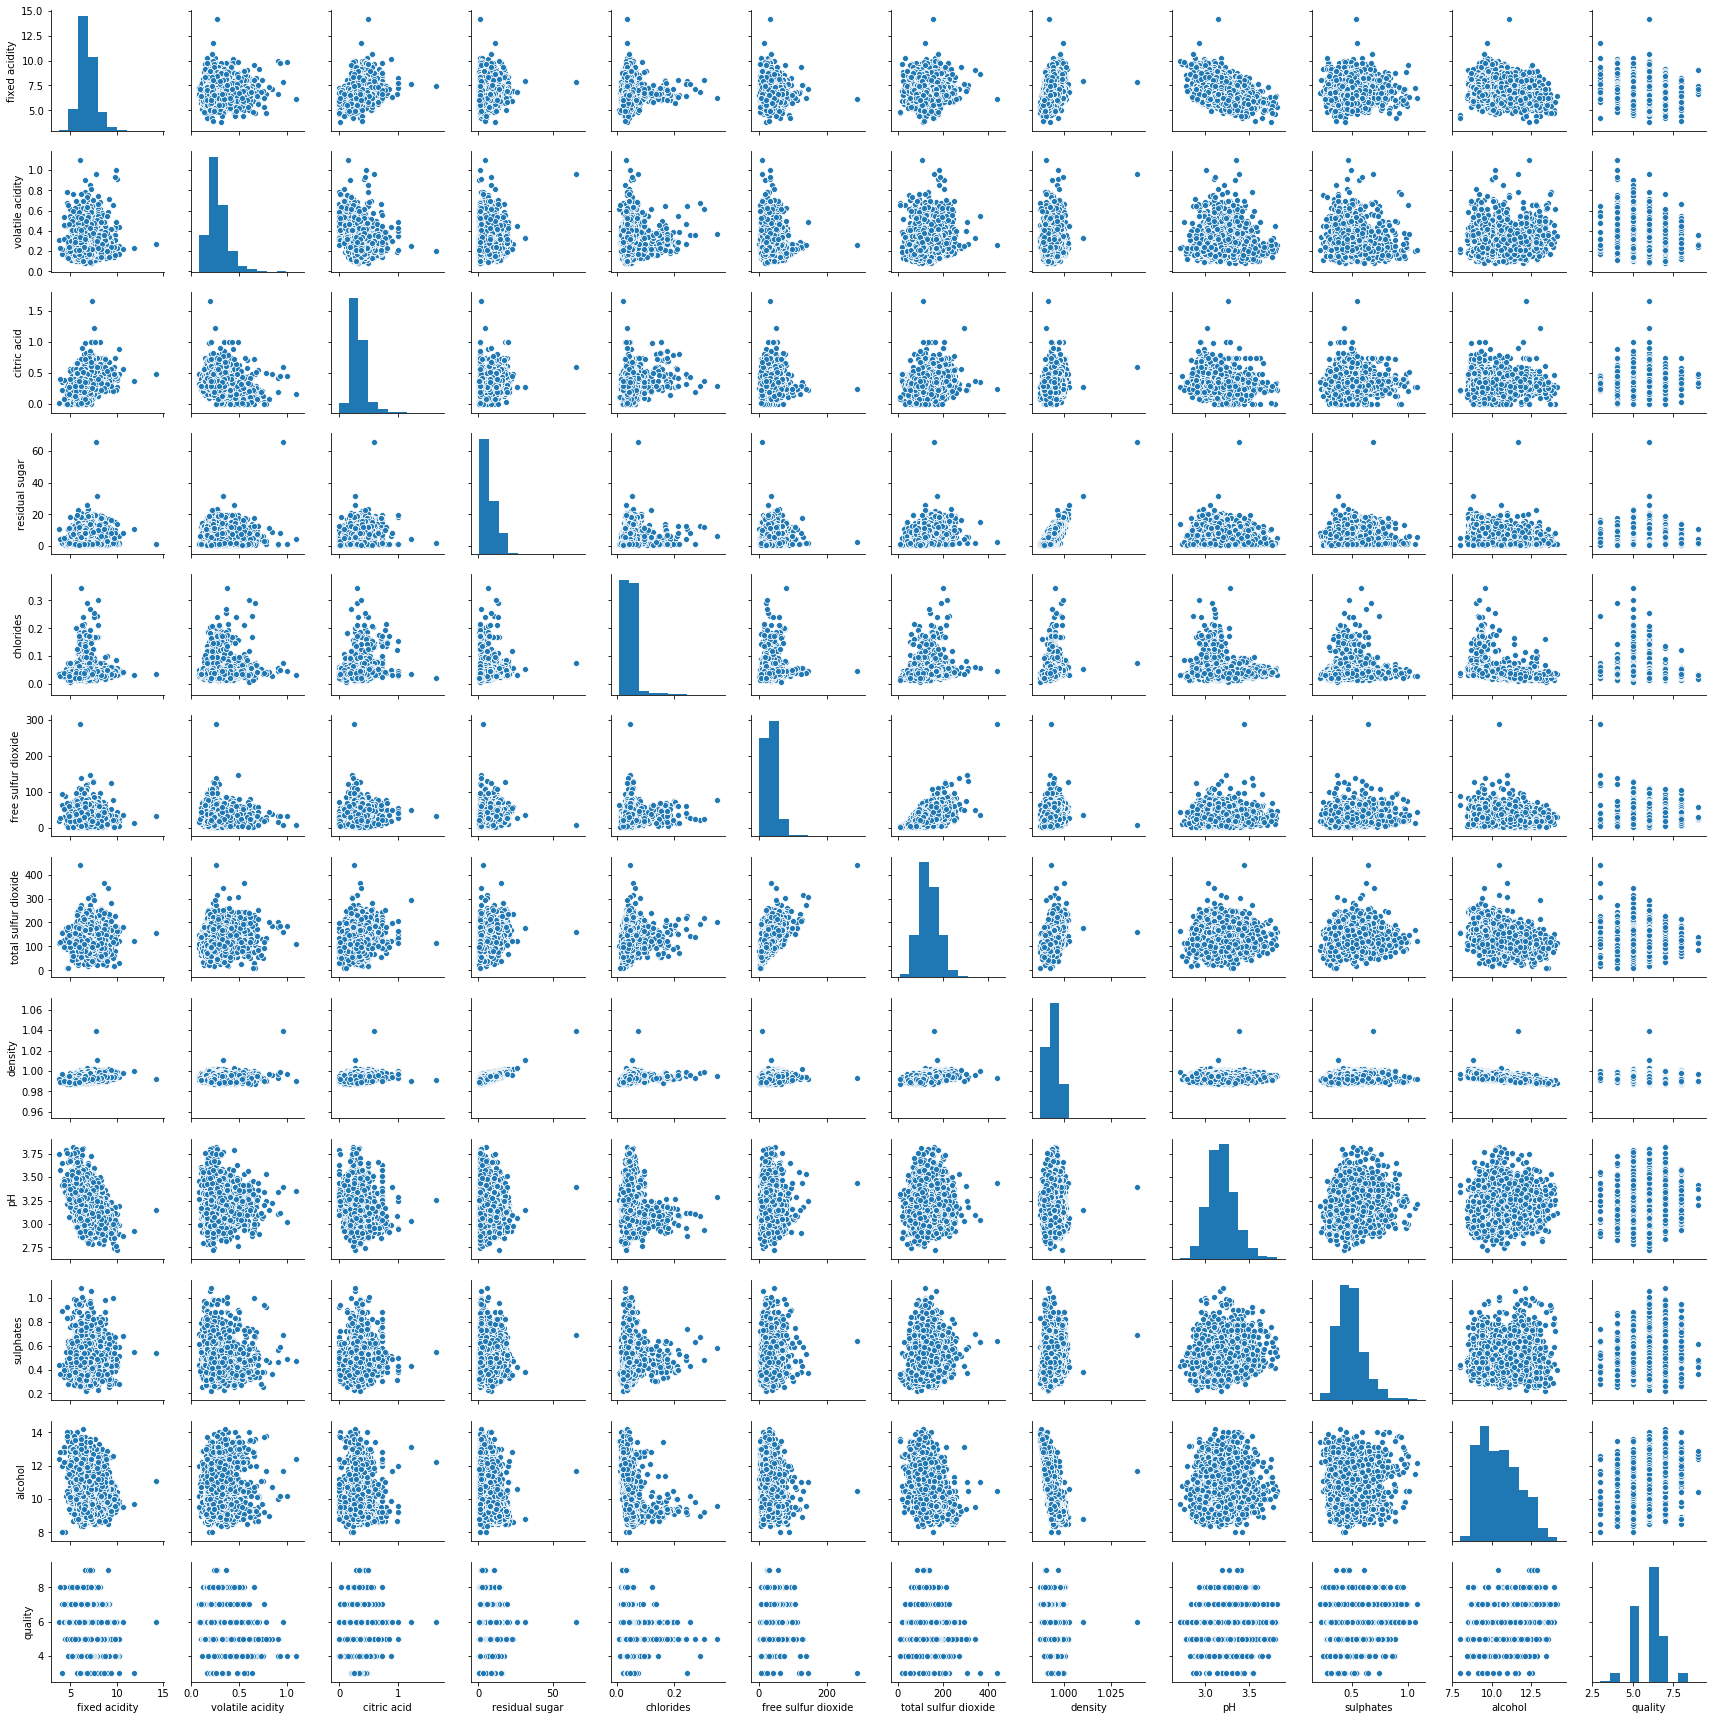

In [154]:
sns.pairplot(wwine,height=2.0)
plt.show()

相関係数のチェック

In [155]:
wwine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## 前処理

In [159]:
X_w = wwine.loc[:, ['density', 'fixed acidity']].values
X_w

array([[1.001  , 7.     ],
       [0.994  , 6.3    ],
       [0.9951 , 8.1    ],
       ...,
       [0.99254, 6.5    ],
       [0.98869, 5.5    ],
       [0.98941, 6.     ]])

In [160]:
# ホールド・アウト法によるデータの分割（今回はtestを２割とする）
from sklearn.model_selection import train_test_split
X_w_train, X_w_test, Y_w_train, Y_w_test = train_test_split(X_w, Y_w, test_size = 0.2, random_state = 0)

In [161]:
# 分割されたデータの個数を確認
print(X_w.shape)
print(Y_w.shape)
print(X_w_train.shape)
print(Y_w_train.shape)
print(X_w_test.shape)
print(Y_w_test.shape)

(4898, 2)
(4898, 1)
(3918, 2)
(3918, 1)
(980, 2)
(980, 1)


## 重回帰モデル

In [162]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_w_train, Y_w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
lr.intercept_

array([357.14224364])

In [164]:
lr.coef_

array([[-3.49817465e+02,  1.60017362e-01]])

重回帰モデルは以下の関数になる
$$ y = 357.1 -3.498x_1 + 0.1600x_2 $$

## モデルの評価

In [165]:
# 決定係数：データのモデルへの当てはまりの良さ
print('train: %.3f' % lr.score(X_w_train, Y_w_train))
print('test : %.3f' % lr.score(X_w_test, Y_w_test))

train: 0.655
test : 0.451


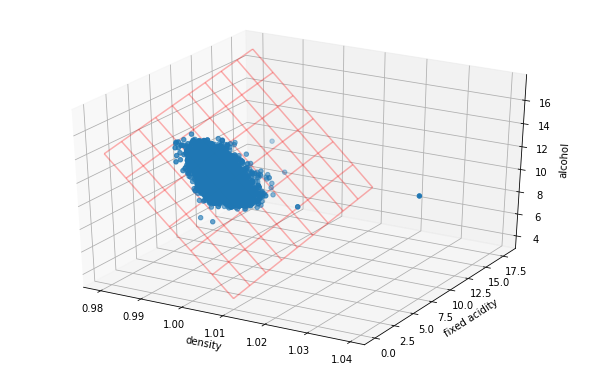

In [182]:
# mpl_toolkitsを用いて3次元の描画する
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(8, 5)))

# (x, y , z)
ax.scatter3D(wwine['density'], wwine['fixed acidity'], wwine['alcohol'])

# 関数の指定
X_grid, Y_grid = np.meshgrid(np.arange(0.98, 1.01, 0.005), np.arange(0, 20, 2))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 平面の描画
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# ラベル
ax.set_xlabel('density')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('alcohol')

plt.show()

## 多項式回帰

In [167]:
dens_w = wwine.loc[:, ['density']].values
fixed_acidity_w = wwine.loc[:, ['fixed acidity']].values
y_w = wwine.loc[:, ['alcohol']].values

In [168]:
from sklearn.model_selection import train_test_split
dens_w_train, dens_w_test, y_w_train, y_w_test = train_test_split(dens_w, y_w, test_size = 0.2, random_state = 0)

## 単回帰

In [169]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(dens_w_train, y_w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

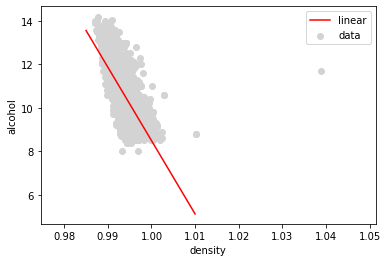

In [170]:
# データの散布図表示
plt.scatter(dens_w, y_w, color='lightgray', label='data')
x = np.arange(0.985, 1.01, 0.005)[:, np.newaxis]

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')
# ラベルを表示
plt.xlabel('density')
plt.ylabel('alcohol')

# 凡例
plt.legend(loc = 'upper right')

plt.show()

## 多項式回帰

In [171]:
# 変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
dens_w_quad = quad.fit_transform(dens_w)
dens_w_quad

array([[1.        , 1.001     , 1.002001  ],
       [1.        , 0.994     , 0.988036  ],
       [1.        , 0.9951    , 0.99022401],
       ...,
       [1.        , 0.99254   , 0.98513565],
       [1.        , 0.98869   , 0.97750792],
       [1.        , 0.98941   , 0.97893215]])

In [172]:
## データの分割
dens_w_quad_train, dens_w_quad_test, y_w_train, y_w_test = train_test_split(dens_w_quad, y_w, test_size = 0.2, random_state = 0)

In [173]:
model_quad = LinearRegression()
model_quad.fit(dens_w_quad_train, y_w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

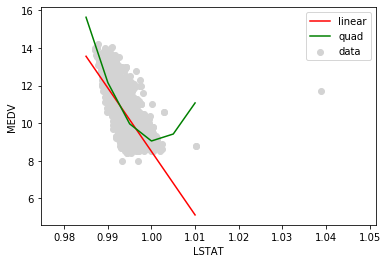

In [174]:
#データの散布図を表示
plt.scatter(dens_w, y_w, color='lightgray', label='data')

# 直線の描画
plt.plot(x, model_lin.predict(x), color='red', label='linear')

# 変数変換する
x_quad = quad.fit_transform(x)

# 回帰曲線を表示（2次関数）
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')

# ラベルを表示
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 凡例を表示
plt.legend(loc = 'upper right')

# 上記の内容でグラフを表示
plt.show()

In [175]:
# 変数変換

cubic = PolynomialFeatures(degree=3)

dens_w_cubic = cubic.fit_transform(dens_w)
dens_w_cubic

array([[1.        , 1.001     , 1.002001  , 1.003003  ],
       [1.        , 0.994     , 0.988036  , 0.98210778],
       [1.        , 0.9951    , 0.99022401, 0.98537191],
       ...,
       [1.        , 0.99254   , 0.98513565, 0.97778654],
       [1.        , 0.98869   , 0.97750792, 0.9664523 ],
       [1.        , 0.98941   , 0.97893215, 0.96856526]])

In [176]:
#データ分割
dens_w_cubic_train, dens_w_cubic_test, y_w_train, y_w_test = train_test_split(dens_w_cubic, y_w, test_size = 0.2, random_state = 0)

In [177]:
#モデルの学習
model_cubic = LinearRegression()
model_cubic.fit(dens_w_cubic_train, y_w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

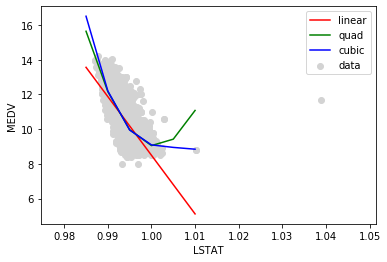

In [178]:
plt.scatter(dens_w, y_w, color='lightgray', label='data') 
plt.plot(x, model_lin.predict(x), color='red', label='linear')
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')
x_cubic = cubic.fit_transform(x)
plt.plot(x, model_cubic.predict(x_cubic), color='blue', label='cubic')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

カクカクしてるのはなぜ？

決定係数

In [179]:
#線形回帰
print('train: %.3f' % model_lin.score(dens_w_train, y_w_train)) 
print('test : %.3f' % model_lin.score(dens_w_test, y_w_test))

#2次関数
print('train: %.3f' % model_quad.score(dens_w_quad_train, y_w_train)) 
print('test : %.3f' % model_quad.score(dens_w_quad_test, y_w_test))

#3次関数
print('train: %.3f' % model_cubic.score(dens_w_cubic_train, y_w_train)) 
print('test : %.3f' % model_cubic.score(dens_w_cubic_test, y_w_test))

# 重回帰
print('train: %.3f' % lr.score(X_w_train, Y_w_train))
print('test : %.3f' % lr.score(X_w_test, Y_w_test))

train: 0.644
test : 0.456
train: 0.694
test : -0.115
train: 0.697
test : -0.258
train: 0.655
test : 0.451


選んだモデル

１次関数による回帰

モデルを選んだ理由

調べられた１次関数・２次関数・３次関数での多項式回帰・重回帰モデルのうち、決定係数から、訓練データにおいてもテストデータにおいても、１次関数での回帰がデータのモデルへの当てはまりの良さが最も良いことが示されているから。また、下記のようにグラフの可視化を行っても、1次関数での回帰がデータのモデルへの当てはまりが良く見られるから。


数式の記述

In [180]:
model_lin.intercept_

array([346.09999941])

In [181]:
model_lin.coef_

array([[-337.60529805]])

$$ y = 346.1 -337.6x $$

解釈

UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「Wine Quality Data Set (ワインの品質)」の白ワインのデータセットを用い、白ワインはdensityが高いほどアルコール度数が高いという仮説を立て検証した。説明変数をdensity,目的変数をalcoholとおき、重回帰分析・多項式関数による回帰分析を実施した。 
調べられた１次関数・２次関数・３次関数での多項式回帰・重回帰モデルのうち、決定係数から、訓練データにおいてもテストデータにおいても、１次関数での回帰がデータのモデルへの当てはまりの良さが最も良いことが示されていること、また、グラフの可視化を行っても、1次関数での回帰がデータのモデルへの当てはまりが良く見られることから、単回帰によるモデルの当てはめを行った。
単回帰分析結果、densityが高いほどアルコール度数が低くなるという結果が出て、仮説と反対の結果が出た。アルコール（エタノール）の分子量46と比べて、白ワインの成分（ブドウ果汁）の分子量が大きいことがこの結果の要因であると考えられる。相関係数は-0.780と十分高く、この結果は妥当であると考えられる。出力したモデルに微分不可能な点が出ていることの理由を探ることが、今後の課題である。